<a href="https://colab.research.google.com/github/jwils01/jwils01.github.io/blob/main/GrokAssistedInsights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## REGRESION MODEL TO PREDICT MONTHLY SPEND
# 1 Snippet GROK uses print! Looking for NULL & SKEW
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1XSBE7VwTJ-xB300r2JAwZesaAbGTLvMgS4qRxXfDjys/pub?gid=0&single=true&output=csv')  # Or upload to Colab
print(df.head())
print(df.tail())
print(df.info())  # Check dtypes, nulls
print(df.describe())  # Quick stats—watch for skewed spend (e.g., mean >> median?)

   Customer ID Title First Name Middle Name Last Name Suffix  \
0        11000   NaN        Jon           V      Yang    NaN   
1        11001   NaN     Eugene           L     Huang    NaN   
2        11002   NaN      Ruben         NaN    Torres    NaN   
3        11003   NaN    Christy         NaN       Zhu    NaN   
4        11004   NaN  Elizabeth         NaN   Johnson    NaN   

       Street Address1 Street Address2        City-ZipCode-State Birth Date  \
0      3761 N. 14th St             NaN      Cleveland-44101-Ohio     4/8/66   
1           2243 W St.             NaN  Seattle-98101-Washington    5/14/65   
2     5844 Linden Land             NaN      Omaha-68101-Nebraska    8/12/65   
3     1825 Village Pl.             NaN    Fort Worth-76101-Texas    2/15/68   
4  7553 Harness Circle             NaN  Oakland-94601-California     8/8/68   

   ...    Occupation Gender Marital Status Home Owner Status  \
0  ...  Professional      M              M                 1   
1  ...  Prof

In [2]:
#check birthdate vals
print(df.tail())

       Customer ID Title First Name Middle Name   Last Name Suffix  \
16514        13121   NaN    Latasha           E     Jimenez    NaN   
16515        26100   NaN      James      Garner  Ptaszynski    NaN   
16516        11328   NaN     Julian           M     Griffin    NaN   
16517        23077   NaN     Marvin           A   Hernandez    NaN   
16518        18982   NaN       Kyle         NaN       Baker    NaN   

           Street Address1 Street Address2             City-ZipCode-State  \
16514       7259 Birchwood             NaN        San Antonio-78201-Texas   
16515      7345 Kenwal Rd.             NaN  Pittsburgh-15201-Pennsylvania   
16516  7398 Withersed Lane             NaN          Honolulu-96801-Hawaii   
16517       1019 Book Road             NaN       Anaheim-92801-California   
16518      2118 Little Dr.             NaN       Fort Wayne-46801-Indiana   

      Birth Date  ...      Occupation Gender Marital Status Home Owner Status  \
16514    3/22/65  ...    Profession

In [3]:
# 2 This is straight from class I remember because of *NotebookLM* Flashcards!
df.isnull().sum()/len(df)*100

,0
Customer ID,0.000000
Title,99.467280
First Name,0.000000
Middle Name,42.284642
Last Name,0.000000
Suffix,99.987893
Street Address1,0.000000
Street Address2,98.329197
City-ZipCode-State,0.000000
Birth Date,0.000000


In [4]:
#REMEMBER 50% IS MEDIAN ! y variable in REG: AVG MONTHLY SPEND Right-Skewed
#I asked why should i care if non-predictor is skewed & learned alot I hope#
print(df.describe())

        Customer ID  Home Owner Status  Number of Cars Owned  \
count  16519.000000       16519.000000          16519.000000   
mean   20234.225195           0.673891              1.500999   
std     5342.515987           0.468802              1.138962   
min    11000.000000           0.000000              0.000000   
25%    15604.500000           0.000000              1.000000   
50%    20221.000000           1.000000              2.000000   
75%    24860.500000           1.000000              2.000000   
max    29482.000000           1.000000              4.000000   

       Number of Children At Home  Total Number of Children  Annual Income  \
count                16519.000000              16519.000000   16519.000000   
mean                     0.992009                  2.006235   78122.511532   
std                      1.515048                  1.682736   39710.985718   
min                      0.000000                  0.000000    9482.000000   
25%                      0.000000

In [5]:
df['Avg Monthly Spend'].skew()

1.3128974036193004

In [6]:
# 3 Snippet I asked GEMINI to parse CITY-STATE-ZIP in the df!!!
import re

def parse_city_zip_state(s):
    match = re.match(r'([A-Za-z\s-]+)-(\d{5})-(.*)', s)
    if match:
        city = match.group(1).strip()
        zip_code = match.group(2).strip()
        state = match.group(3).strip()
        return city, zip_code, state
    return None, None, None

# Apply the function to the 'City-ZipCode-State' column
df[['City', 'Zip Code', 'State']] = df['City-ZipCode-State'].apply(lambda x: pd.Series(parse_city_zip_state(x)))

print(df[['City', 'Zip Code', 'State', 'City-ZipCode-State']].head())


         City Zip Code       State        City-ZipCode-State
0   Cleveland    44101        Ohio      Cleveland-44101-Ohio
1     Seattle    98101  Washington  Seattle-98101-Washington
2       Omaha    68101    Nebraska      Omaha-68101-Nebraska
3  Fort Worth    76101       Texas    Fort Worth-76101-Texas
4     Oakland    94601  California  Oakland-94601-California


In [7]:
#I want to save this as a new CSV just in case
df.to_csv('CleanBookstore_beforeLog-MonthlySpend')

In [8]:
#4 Snippet start drop useless cols - keeping city, zip, state ask Vamsi if noise
cols_to_drop = ['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
                'Suffix', 'Street Address1', 'Street Address2']

df_clean = df.drop(columns=cols_to_drop)

In [9]:
df_clean.columns

Index(['City-ZipCode-State', 'Birth Date', 'Education Level', 'Occupation',
       'Gender', 'Marital Status', 'Home Owner Status', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'Annual Income', 'Avg Monthly Spend', 'eBook Subscriber Flag', 'City',
       'Zip Code', 'State'],
      dtype='object')

In [10]:
from datetime import datetime
#4B Snippet -- Defining Current Year
current_year = datetime.now().year

In [19]:
#4B Will see about AGE now
df_clean['Birth Date'] = pd.to_datetime(df_clean['Birth Date'], format='%m/%d/%y')

# Adjust years where two-digit year parsing might have incorrectly assigned the 21st century
df_clean.loc[df_clean['Birth Date'].dt.year > current_year, 'Birth Date'] -= pd.offsets.DateOffset(years=100)

df_clean['Age'] = current_year - df_clean['Birth Date'].dt.year

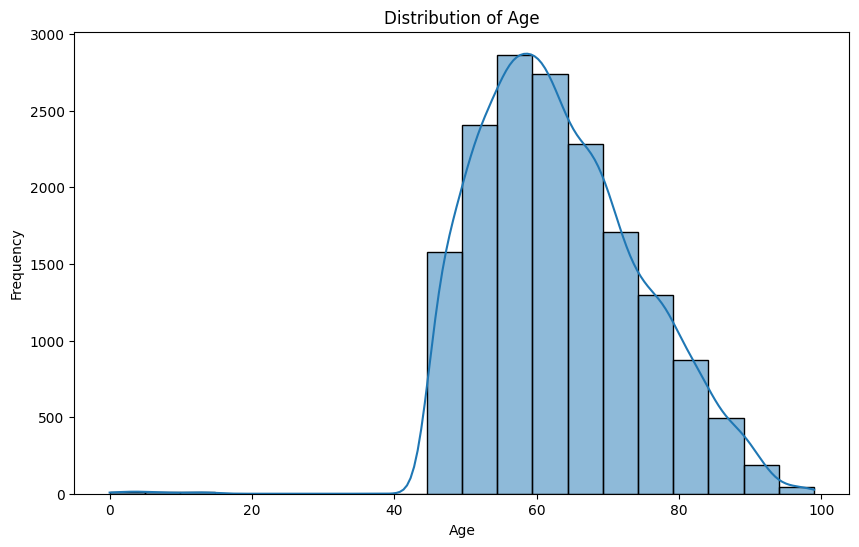

,Age
count,16519.000000
mean,63.263575
std,11.362715
min,0.000000
25%,55.000000
50%,62.000000
75%,71.000000
max,99.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

display(df_clean['Age'].describe())

In [13]:
#5 FROM AI Transform target variable "Monthly spend" to LOG to fix right-skew
import numpy as np
df_clean['Avg Monthly Spend_log'] = np.log1p(df_clean['Avg Monthly Spend'])


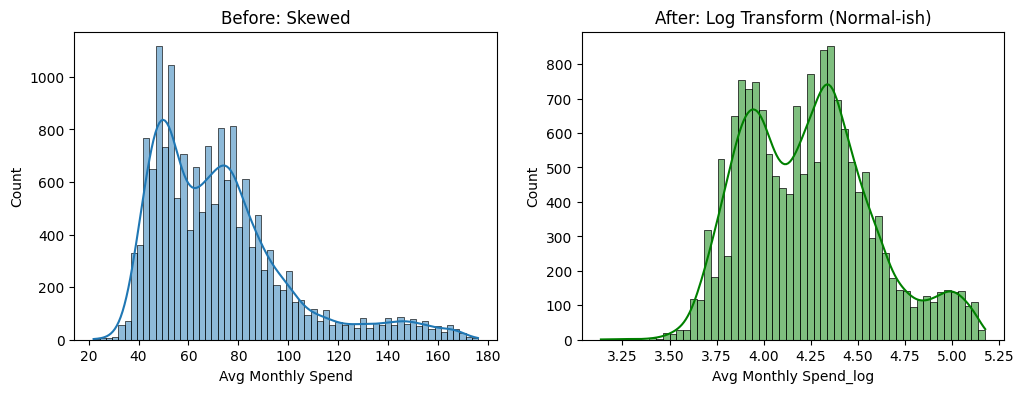

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#6 From AI *** PLOT BEFORE AFTER EDU PURPOSES of y variable(Monthly Spend) ***
# Plot before/after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_clean['Avg Monthly Spend'], ax=ax1, kde=True)
ax1.set_title('Before: Skewed')

sns.histplot(df_clean['Avg Monthly Spend_log'], ax=ax2, kde=True, color='green')
ax2.set_title('After: Log Transform (Normal-ish)')

plt.show()

In [15]:
#Just about to do pycaret setup for REGRESSION but it is no 2:20AM -- tomorrow!!
df_clean.to_csv('CleanBook_afterLog-MonthSpend')

In [16]:
#6 BIG DOG y-data on clean data
!pip install -U ydata-profiling[notebook]
'''
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Ebookstore YData EDA")
profile.to_file("ydata_eda_report.html")  # Download/view in Colab
'''

'\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(df, title="Ebookstore YData EDA")\nprofile.to_file("ydata_eda_report.html")  # Download/view in Colab\n'

In [17]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_clean, title="Ebookstore EDA")
profile.to_file("eda_report.html")  # Download/view in Colab

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 18.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
#7 Snippet PYCARET for the win!
# prayers during this comment will be greatly appreciated
# GROK explained YData & adds # children/income metric
!pip install pycaret
from pycaret.regression import *

# Make sure you have these columns exist:
# 'Avg Monthly Spend_log'  → target
# 'Age'                   → fixed
# Drop the original spend column

df_final = df_clean.copy()

# Optional but smart: create one powerful feature
df_final['Has_Kids_At_Home'] = (df_final['Number of Children At Home'] > 0).astype(int)
df_final['Income_Per_Kid_At_Home'] = df_final['Annual Income'] / (df_final['Number of Children At Home'] + 1)

reg = setup(
    data = df_final,
    target = 'Avg Monthly Spend_log',
    session_id = 123,
    train_size = 0.8,
    fold = 10,
    normalize = True,                    # Handles Age & Income skew perfectly
    remove_outliers = True,              # Removes ~1-2% whales
    outliers_threshold = 0.05,
    categorical_features = [
        'Education Level',
        'Occupation',
        'Gender',
        'Marital Status',
        'Home Owner Status',
        'State'                  # Keep if you want geo signal, or drop if too many levels
    ],
    ignore_features = [
        'Customer ID',
        'Birth Date',
        'Avg Monthly Spend',     # <--- ORIGINAL — DO NOT KEEP
        'City-ZipCode-State',    # redundant with State
        'City', 'Zip Code'       # if you split them
    ]
)

# This will run in ~2 minutes and give you the winner
best_model = compare_models(sort = 'RMSE', n_select = 1)

,Description,Value
0,Session id,123
1,Target,Avg Monthly Spend_log
2,Target type,Regression
3,Original data shape,"(16519, 20)"
4,Transformed data shape,"(15858, 23)"
5,Transformed train set shape,"(12554, 23)"
6,Transformed test set shape,"(3304, 23)"
7,Ignore features,6
8,Numeric features,8
9,Categorical features,6


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0380,0.0025,0.0499,0.9784,0.0099,0.0092,1.4160
lightgbm,Light Gradient Boosting Machine,0.0382,0.0025,0.0503,0.9780,0.0100,0.0093,0.8530
xgboost,Extreme Gradient Boosting,0.0397,0.0028,0.0524,0.9761,0.0104,0.0097,0.4410
rf,Random Forest Regressor,0.0410,0.0030,0.0543,0.9744,0.0108,0.0100,3.8210
et,Extra Trees Regressor,0.0432,0.0033,0.0572,0.9716,0.0114,0.0105,2.8720
lr,Linear Regression,0.0448,0.0037,0.0609,0.9677,0.0121,0.0109,1.1290
ridge,Ridge Regression,0.0448,0.0037,0.0609,0.9678,0.0121,0.0109,0.3070
br,Bayesian Ridge,0.0448,0.0037,0.0609,0.9678,0.0121,0.0109,0.3100
huber,Huber Regressor,0.0445,0.0037,0.0611,0.9675,0.0121,0.0108,0.4230
par,Passive Aggressive Regressor,0.0556,0.0053,0.0726,0.9537,0.0142,0.0134,0.3140


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [22]:
#10 Snippet
# Descriptive stats back to dollars & cents (Grok)
# Convert predictions back to dollars
from sklearn.metrics import mean_absolute_error

holdout = get_config('X_test')
holdout['Actual_Spend'] = np.expm1(get_config('y_test'))
holdout['Predicted_Spend'] = np.expm1(predict_model(best_model, data=holdout)['prediction_label'])

print("Real-dollar MAE:", mean_absolute_error(holdout['Actual_Spend'], holdout['Predicted_Spend']))
print("Real-dollar examples:")
print(holdout[['Actual_Spend', 'Predicted_Spend']].head(10).round(2))

Real-dollar MAE: 2.57917427185565
Real-dollar examples:
       Actual_Spend  Predicted_Spend
10905          34.0            40.46
6041           62.0            60.06
13421         146.0           145.44
7671           91.0            95.34
798           100.0            99.36
8053           82.0            82.69
390            70.0            62.45
3536           77.0            79.65
16145          73.0            72.73
8308           70.0            70.02
